### Initial Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
df = pd.read_csv('adult(cleaned).csv')

### Splitting Features and Target

In [3]:
x = df.drop('income', axis = 1)
y = df[['income']]

### Checking y value split

In [4]:
y.value_counts()

income
0         34569
1         11416
Name: count, dtype: int64

### Splitting Train Test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

### Function to display metrics of Model

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### KNN Champion Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
KNN = KNeighborsClassifier(n_neighbors=28, metric="manhattan", weights="distance")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

#### Metrics

accuracy : 0.8380447073149517
recall : 0.6156271899088998
precision : 0.6966693100713719
f1 : 0.6536458333333334


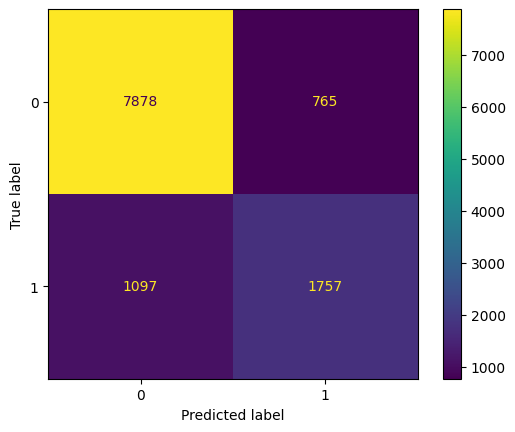

In [10]:
metrics(y_test, y_pred)

#### ROC Curve

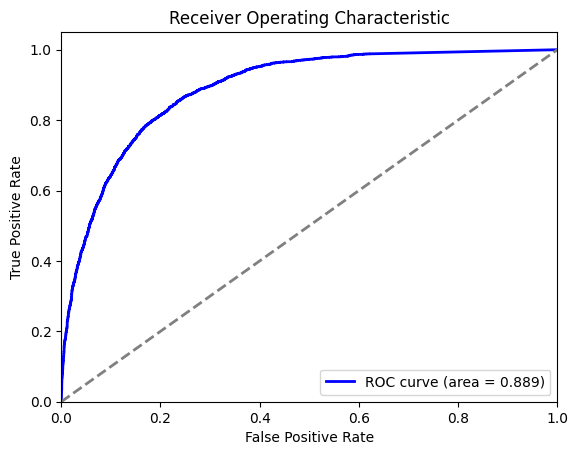

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = KNN.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()